In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
#df_con = pd.read_csv("../avg.N.SGL.294K.tt.dat", delim_whitespace=True, names= ["z", "p(z)"])

In [7]:
#df_con

,z,p(z)
0,1.0,3.89
1,3.0,3.59
2,5.0,3.43
3,7.0,3.23
4,9.0,2.85
...,...,...
60,121.0,0.05
61,123.0,0.06
62,125.0,0.06
63,127.0,0.07


In [11]:
## data conversion for wt/wt factor
#df_con = pd.read_csv("avg.N.SGL.294K.tt.dat", delim_whitespace=True, names= ["z", "p(z)"])
## conversion factor 0.2323 ((741.5 * 1.66 * 10-27)/(2*51.47*51.47*1*10-27))
#df_con ['conv'] = df_con["p(z)"]*0.2323
#df_con.to_csv('out.FFssFFmix.294K.tt.csv', index=False, columns=['z','conv'], float_format='%.3f')

from numpy import genfromtxt
data = genfromtxt('../avg.N.SGL.294K.tt.dat', delimiter=' ')
#data = np.loadcsv('out.FFssFFmix.294K.csv')


In [108]:
df_con

,z,p(z),conv
0,1.0,3.39,0.76953
1,3.0,3.36,0.76272
2,5.0,3.17,0.71959
3,7.0,2.96,0.67192
4,9.0,2.70,0.61290
...,...,...,...
60,121.0,0.14,0.03178
61,123.0,0.15,0.03405
62,125.0,0.15,0.03405
63,127.0,0.15,0.03405


[ 0.80508088  0.02532451  8.58500028 14.08835424]


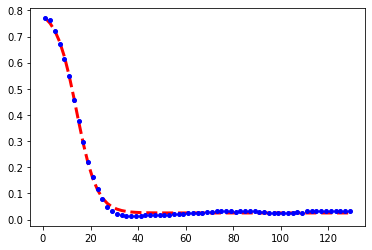

In [143]:
## data conversion from avg value to wt/wt:
#df_con = pd.read_csv("../avg.N.SGL.326K.tt.dat", delim_whitespace=True, names= ["z", "p(z)"])
df_con = pd.read_csv("../avg.N.SGL.360K.ramp.tt.dat", delim_whitespace=True, names= ["z", "p(z)"])

## conversion factor 0.2323 for 294K ((741.5 * 1.66 * 10-27)/(2*51.47*51.47*1*10-27))
## conver fact for 310K is 0.229 (((741.5 * 1.66 * 10-27)/(2*51.78*51.78*1*10-27)))
## convert fact for 326K is 0.227
## convert fact for 340K is 0.2248
## convert fact for 340K and 360K ramp is 0.2272

df_con ['conv'] = df_con["p(z)"]*0.2272
df_con.to_csv('../out.FFssFFmix.360K.ramp.conv.csv', index=False, columns=['z','conv'], float_format='%.3f')

from numpy import genfromtxt
data = genfromtxt('../out.FFssFFmix.360K.ramp.conv.csv', delimiter=',', skip_header=1)
#data = genfromtxt('../avg.N.SGL.360K.Ramp.dat', delimiter=' ')
def func(x,a, b,w,z):
    # return 1- np.exp(-(k*x)**n)
    return ((a+b)/2) - ((a-b)/2)*np.tanh((x-z)/w)

xdata = data[:,0]
ydata = data[:,1]
xdata_cut = []
ydata_cut = []
for i in range(len(xdata)):
    if xdata[i] < 130:
        xdata_cut.append(xdata[i])
        ydata_cut.append(ydata[i])

popt, pcov = curve_fit(func, xdata_cut, ydata_cut,p0=np.asarray([1,0.003,0.9,17.4]))
print(popt)
plt.plot(xdata_cut, func(xdata_cut, *popt), 'r--',linewidth=3)
# plt.plot(xdata_cut,ydata_cut,'o',color='blue',label=r'T=0.65,$\rho$=%0.5f,R=%0.2f,w=%0.2f'%(popt[0],popt[3],popt[2]))
plt.plot(xdata_cut,ydata_cut,'o',markersize=4,color='blue',label=r'T=0.65')

#import pandas as pd
#df = pd.DataFrame({"z" : xdata_cut, "p(z)" : pz_tolist, "raw_p(z)": ydata_cut})
#df.to_csv("FFssFF.N.294K.fitting.csv", index=False, float_format='%.3f')

pz_tolist= (func(xdata_cut,*popt)).tolist()
#import pandas as pd
ddf = pd.DataFrame({"z" : xdata_cut, "p(z)" : pz_tolist, "raw_p(z)": ydata_cut})
ddf.to_csv("FIT.FFssFF.360K.ramp.csv", index=False, float_format='%.3f')

In [125]:
pz_tolist= (func(xdata_cut,*popt)).tolist()

In [121]:
type(pz_tolist)

list

In [131]:
len(ydata_cut)

65

In [130]:
pz_tolist= (func(xdata_cut,*popt)).tolist()
#import pandas as pd
ddf = pd.DataFrame({"z" : xdata_cut, "p(z)" : pz_tolist, "raw_p(z)": ydata_cut})
ddf.to_csv("NEW.FIT.FFssFF.csv", index=False, float_format='%.3f')

In [148]:
ddff = pd.read_csv("FIT.FFssFF.294K.csv", delim_whitespace=False)

In [151]:
ddff

,z,p(z),raw_p(z)
0,1.0,0.834,0.787
1,3.0,0.816,0.836
2,5.0,0.790,0.834
3,7.0,0.753,0.776
4,9.0,0.703,0.692
...,...,...,...
60,121.0,0.009,0.014
61,123.0,0.009,0.014
62,125.0,0.009,0.014
63,127.0,0.009,0.016


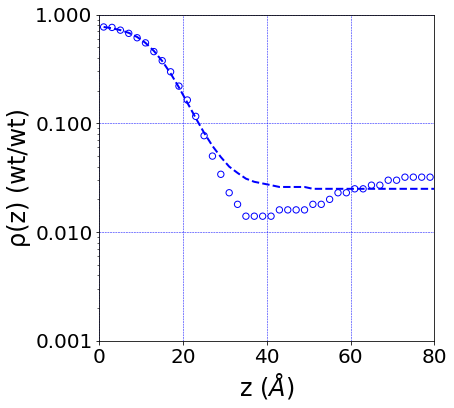

In [163]:
## read FIT data
ddff = pd.read_csv("FIT.FFssFF.360K.ramp.csv", delim_whitespace=False)
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(1034, figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("z ($\AA$)",fontsize=24)
ax1.set_ylabel("\u03C1(z) (wt/wt)", fontdict={'fontsize':24})
ax1.scatter(ddff['z'], ddff['raw_p(z)'],s=40, facecolors='none', edgecolors='b')
plt.plot(ddff['z'], ddff['p(z)'], 'b--',linewidth=2)
#ax1.scatter(dff['z'], dff['p(z)'],s=40, facecolors='none', edgecolors='b', label='Tip4pd' )
#ax1.legend(frameon=False, prop={'size':14}, loc='upper right')
ax1.set_xlim([0, 80])
#ax1.set_ylim([-100, 100])
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f')) 
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)
ax1.tick_params(axis ='both', which= 'major', left = 'bool', labelsize=20)
ax1.tick_params(axis ='both', which= 'minor', left='bool', labelsize=20)
ax1.tick_params(axis='both', which= 'major', bottom = 'bool', labelsize=20 )
ax1.tick_params(axis='both', which= 'minor', bottom = 'bool', labelsize=20 )
plt.yticks([0.001, 0.01, 0.1, 1])
fig.savefig('FFssFF.mix.FIT.FINAL.360K.ramp.png',bbox_inches='tight', dpi=500)
#plt.title("FFssFF.mix.294K")
plt.show()

# Temp and Density plot

In [166]:
den = pd.read_csv("FIT.TEMP.DENSITY.csv", delim_whitespace=False)

In [194]:
den

,t,p(bulk),p(den)
0,290,0.0090,0.8701
1,310,0.0203,0.8497
2,326,0.0240,0.8339
3,340,0.0220,0.8162
4,360,0.0250,0.8053


In [196]:
x1= den['p(den)']
y1= den['t']

x2= den['p(bulk)']
y1= den['t']

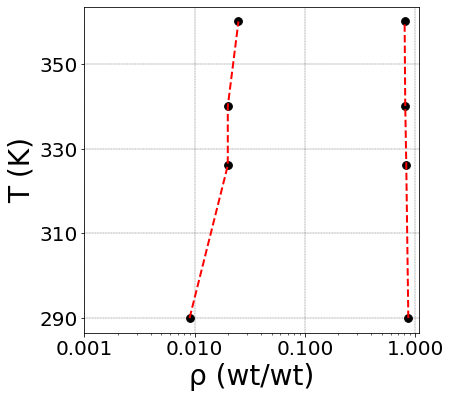

In [224]:
## read FIT data
den = pd.read_csv("FIT.TEMP.DENSITY.csv", delim_whitespace=False)

x1= den['p(den)']
y1= den['t']

x2= den['p(bulk)']
y1= den['t']
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(1034, figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.set_ylabel("T (K)",fontsize=28)
ax1.set_xlabel("\u03C1 (wt/wt)", fontdict={'fontsize':28})
plt.plot(x1,y1, 'r--',linewidth=2)
ax1.scatter(x1, y1, marker='o', color='black', s=60)



##################################3
#ax1.scatter(x2, y1,s=60, edgecolors='black')

plt.plot(x2,y1, 'r--',linewidth=2)
ax1.scatter(x2, y1, marker='o', color='black', s=60)

#plt.plot(den['t'], den['p(den)'], s=40, facecolors='none', edgecolors='r')
#ax1.scatter(dff['z'], dff['p(z)'],s=40, facecolors='none', edgecolors='b', label='Tip4pd' )
#ax1.legend(frameon=False, prop={'size':14}, loc='upper right')
#ax1.set_xlim([0, 80])
#ax1.set_ylim([-100, 100])
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f')) 
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3)
ax1.tick_params(axis ='both', which= 'major', left = 'bool', labelsize=20)
ax1.tick_params(axis ='both', which= 'minor', left='bool', labelsize=20)
ax1.tick_params(axis='both', which= 'major', bottom = 'bool', labelsize=20 )
ax1.tick_params(axis='both', which= 'minor', bottom = 'bool', labelsize=20 )
plt.xticks([0.001, 0.01, 0.1, 1])
plt.yticks([290,310,330,350])
fig.savefig('TempvsDensity.png',bbox_inches='tight', dpi=500)
#plt.title("FFssFF.mix.294K")
plt.show()

In [105]:
len(ydata_cut)

32

In [45]:
type(ydata_cut)

list

In [20]:
pz= func(xdata_cut, *popt)

In [24]:
type(pz)

numpy.ndarray

In [25]:
len(pz)

40

In [32]:
pz_tolist = pz.tolist()

In [31]:
len(pz_tolist)

40

In [26]:
len(xdata_cut)

40

In [27]:
type(xdata_cut)

list

In [47]:
import pandas as pd
df = pd.DataFrame({"z" : xdata_cut, "p(z)" : pz_tolist, "raw_p(z)": ydata_cut})
df.to_csv("FFssFF.N.294K.fitting.csv", index=False, float_format='%.3f')